In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data_comments = pd.read_csv('comments.csv')
data_videostats = pd.read_csv('videos-stats.csv')

In [4]:
data_comments.head(5)

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [5]:
data_comments.shape

(18409, 5)

In [6]:
data_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18409 entries, 0 to 18408
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18409 non-null  int64  
 1   Video ID    18409 non-null  object 
 2   Comment     18408 non-null  object 
 3   Likes       18409 non-null  float64
 4   Sentiment   18409 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 719.2+ KB


In [20]:
data_comments.describe()

,Unnamed: 0,Likes,Sentiment
count,18409.000000,18409.000000,18409.000000
mean,9204.000000,1040.019447,1.493998
std,5314.364888,10651.366148,0.709928
min,0.000000,0.000000,0.000000
25%,4602.000000,5.000000,1.000000
50%,9204.000000,29.000000,2.000000
75%,13806.000000,190.000000,2.000000
max,18408.000000,891372.000000,2.000000


**Уберем столбец индексов комментариев**

In [8]:
data = data_comments.drop('Unnamed: 0', axis=1)

In [9]:
data.head(5)

,Video ID,Comment,Likes,Sentiment
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [10]:
data['Likes'].describe()

count     18409.000000
mean       1040.019447
std       10651.366148
min           0.000000
25%           5.000000
50%          29.000000
75%         190.000000
max      891372.000000
Name: Likes, dtype: float64

In [11]:
data['Likes'].max()

891372.0

In [12]:
for c in data[data['Likes'] == data['Likes'].max()]['Comment']:
  print(c)
print(data[data['Likes'] == data['Likes'].max()]['Sentiment'])

Like I said in the video, subscribe if you haven’t already and you could win $10,000!
12532    2.0
Name: Sentiment, dtype: float64


In [13]:
def show_comment(sentiment):
  for c in data[data['Sentiment'] == sentiment]['Comment'].head(1):
    print(c)

**Выведем тексты комментариев последовательно: плохой-нормальный-хороший**

In [14]:
for c in range(3):
  show_comment(c)
  print('\n')

Here in NZ 50% of retailers don’t even have contactless credit card machines like pay-wave which support Apple Pay. They don’t like the high fees that come with these.


Let's not forget that Apple Pay in 2014 required a brand new iPhone in order to use it.  A significant portion of Apple's user base wasn't able to use it even if they wanted to.  As each successive iPhone incorporated the technology and older iPhones were replaced the number of people who could use the technology increased.


I will forever acknowledge this channel with the help of your lessons and ideas explanations, Now It's quite helpful while you'll just sit at your comfort and monitor your account Growth.




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


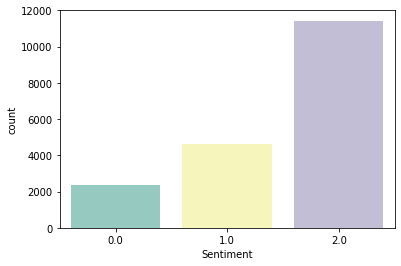

In [15]:
sns.countplot(data['Sentiment'], palette='Set3');

In [16]:
data['Sentiment'].value_counts()

2.0    11432
1.0     4639
0.0     2338
Name: Sentiment, dtype: int64

In [23]:
data = pd.merge(left=data, right=data_videostats, on='Video ID')

In [29]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [30]:
data.head()

,Video ID,Comment,Likes_x,Sentiment,Title,Published At,Keyword,Likes_y,Comments,Views
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0,Apple Pay Is Killing the Physical Wallet After...,2022-08-23,tech,3407.0,672.0,135612.0
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0,Apple Pay Is Killing the Physical Wallet After...,2022-08-23,tech,3407.0,672.0,135612.0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0,Apple Pay Is Killing the Physical Wallet After...,2022-08-23,tech,3407.0,672.0,135612.0
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0,Apple Pay Is Killing the Physical Wallet After...,2022-08-23,tech,3407.0,672.0,135612.0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0,Apple Pay Is Killing the Physical Wallet After...,2022-08-23,tech,3407.0,672.0,135612.0


In [31]:
data.shape

(18645, 10)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18645 entries, 0 to 18644
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Video ID      18645 non-null  object 
 1   Comment       18644 non-null  object 
 2   Likes_x       18645 non-null  float64
 3   Sentiment     18645 non-null  float64
 4   Title         18645 non-null  object 
 5   Published At  18645 non-null  object 
 6   Keyword       18645 non-null  object 
 7   Likes_y       18625 non-null  float64
 8   Comments      18625 non-null  float64
 9   Views         18625 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.6+ MB


In [33]:
data.isna().sum()

Video ID         0
Comment          1
Likes_x          0
Sentiment        0
Title            0
Published At     0
Keyword          0
Likes_y         20
Comments        20
Views           20
dtype: int64

In [28]:
data[data['Comments'].isna()].head(5)

,Video ID,Comment,Likes_x,Sentiment,Unnamed: 0,Title,Published At,Keyword,Likes_y,Comments,Views
18625,f_uwKZIAeM0,Machine learning is an incredibly powerful num...,38.0,2.0,1879,What is Machine Learning?,2017-01-11,machine learning,NaN,NaN,NaN
18626,f_uwKZIAeM0,You have the best way to describe what Machine...,4.0,2.0,1879,What is Machine Learning?,2017-01-11,machine learning,NaN,NaN,NaN
18627,f_uwKZIAeM0,Great introduction. Question: is it always the...,1.0,2.0,1879,What is Machine Learning?,2017-01-11,machine learning,NaN,NaN,NaN
18628,f_uwKZIAeM0,"I love the way you explained, plus the diversi...",2.0,2.0,1879,What is Machine Learning?,2017-01-11,machine learning,NaN,NaN,NaN
18629,f_uwKZIAeM0,"AI is already here, and that is not such a bad...",0.0,2.0,1879,What is Machine Learning?,2017-01-11,machine learning,NaN,NaN,NaN


In [34]:
data['Keyword'].value_counts()

reaction            519
machine learning    513
minecraft           511
cubes               510
tutorial            510
asmr                509
history             506
data science        502
game development    500
mrbeast             500
interview           500
physics             500
trolling            500
xbox                499
cnn                 497
marvel              492
sat                 490
nintendo            490
how-to              489
computer science    483
tech                483
food                479
biology             470
chess               467
sports              465
crypto              464
business            458
mukbang             450
gaming              447
google              444
music               441
literature          441
movies              438
bed                 435
apple               420
lofi                394
animals             371
news                364
finance             321
education           240
mathchemistry       133
Name: Keyword, d

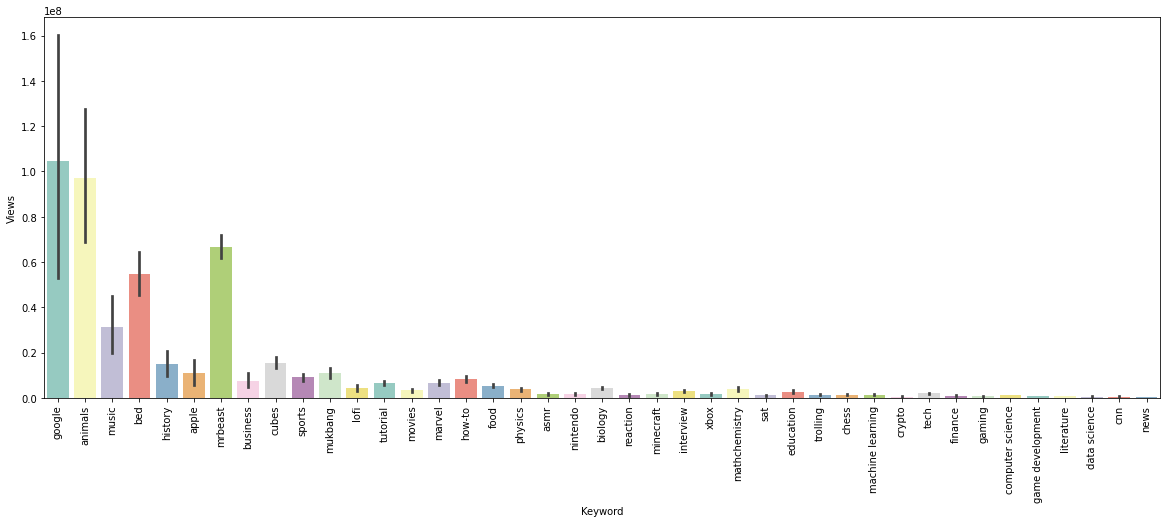

In [45]:
plt.figure(figsize=(20,7))
sns.barplot(x='Keyword', y='Views', data=data.sort_values(by='Views', ascending=False), palette='Set3')
plt.xticks(rotation=90)
plt.show()

In [46]:
data.dropna(inplace=True)

In [48]:
data.isna().sum()

Video ID        0
Comment         0
Likes_x         0
Sentiment       0
Title           0
Published At    0
Keyword         0
Likes_y         0
Comments        0
Views           0
dtype: int64

In [49]:
data.shape

(18624, 10)

In [56]:
data['Published At'].value_counts().sort_values(ascending=False).head(5)

2022-08-24    2841
2022-08-23    1763
2022-08-21     385
2022-08-22     369
2022-08-20     367
Name: Published At, dtype: int64

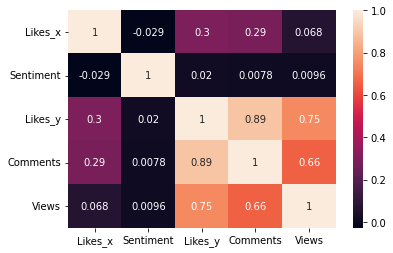

In [59]:
sns.heatmap(data.corr(), annot=True);

In [60]:
data.head(10)

,Video ID,Comment,Likes_x,Sentiment,Title,Published At,Keyword,Likes_y,Comments,Views
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0,Apple Pay Is Killing the Physical Wallet After...,2022-08-23,tech,3407.0,672.0,135612.0
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0,Apple Pay Is Killing the Physical Wallet After...,2022-08-23,tech,3407.0,672.0,135612.0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0,Apple Pay Is Killing the Physical Wallet After...,2022-08-23,tech,3407.0,672.0,135612.0
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0,Apple Pay Is Killing the Physical Wallet After...,2022-08-23,tech,3407.0,672.0,135612.0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0,Apple Pay Is Killing the Physical Wallet After...,2022-08-23,tech,3407.0,672.0,135612.0
5,wAZZ-UWGVHI,We’ve been hounding my bank to adopt Apple pay...,8.0,1.0,Apple Pay Is Killing the Physical Wallet After...,2022-08-23,tech,3407.0,672.0,135612.0
6,wAZZ-UWGVHI,We only got Apple Pay in South Africa in 2020/...,29.0,2.0,Apple Pay Is Killing the Physical Wallet After...,2022-08-23,tech,3407.0,672.0,135612.0
7,wAZZ-UWGVHI,"For now, I need both Apple Pay and the physica...",7.0,1.0,Apple Pay Is Killing the Physical Wallet After...,2022-08-23,tech,3407.0,672.0,135612.0
8,wAZZ-UWGVHI,"In the United States, we have an abundance of ...",2.0,2.0,Apple Pay Is Killing the Physical Wallet After...,2022-08-23,tech,3407.0,672.0,135612.0
9,wAZZ-UWGVHI,"In Cambodia, we have a universal QR code syste...",28.0,1.0,Apple Pay Is Killing the Physical Wallet After...,2022-08-23,tech,3407.0,672.0,135612.0


In [64]:
data[data['Likes_y'] == data['Likes_y'].max()].head(1)

,Video ID,Comment,Likes_x,Sentiment,Title,Published At,Keyword,Likes_y,Comments,Views
5514,FzG4uDgje3M,imagínate ser una generación tan de cristal qu...,7972.0,1.0,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,google,16445558.0,732818.0,4.034122e+09


In [65]:
data[data['Views'] == data['Views'].max()].head(1)

,Video ID,Comment,Likes_x,Sentiment,Title,Published At,Keyword,Likes_y,Comments,Views
5514,FzG4uDgje3M,imagínate ser una generación tan de cristal qu...,7972.0,1.0,El Chombo - Dame Tu Cosita feat. Cutty Ranks (...,2018-04-05,google,16445558.0,732818.0,4.034122e+09


In [80]:
data['Views'].describe()

count    1.862400e+04
mean     1.174143e+07
std      1.088900e+08
min      2.500000e+01
25%      9.284100e+04
50%      6.173500e+05
75%      2.861258e+06
max      4.034122e+09
Name: Views, dtype: float64

In [103]:
data['Keyword'].unique()

array(['tech', 'gaming', 'news', 'minecraft', 'asmr', 'sports', 'how-to',
       'cubes', 'business', 'tutorial', 'finance', 'crypto', 'chess',
       'history', 'apple', 'google', 'interview', 'literature', 'bed',
       'trolling', 'music', 'lofi', 'reaction', 'food', 'mukbang',
       'movies', 'animals', 'education', 'sat', 'mrbeast', 'cnn',
       'mathchemistry', 'biology', 'physics', 'computer science',
       'machine learning', 'nintendo', 'xbox', 'marvel', 'data science',
       'game development'], dtype=object)

In [106]:
data['Keyword'].nunique()

41

Выведем топ 5 категорий по среднему количеству просмотров

In [100]:
data.groupby('Keyword').aggregate('mean').sort_values(by='Views', ascending=False).head(5)

,Likes_x,Sentiment,Likes_y,Comments,Views
Keyword,,,,,
google,826.864865,1.342342,4.775322e+05,22952.162162,1.047615e+08
animals,1264.221024,1.525606,7.792304e+05,22402.374663,9.702109e+07
mrbeast,14069.902000,1.652000,2.105914e+06,95944.480000,6.676400e+07
bed,1034.790805,1.671264,4.791116e+05,15353.754023,5.451219e+07
music,957.233560,1.739229,3.956699e+05,15316.015873,3.116108e+07


Выведем топ 5 категорий по среднему количеству лайков

In [107]:
data.groupby('Keyword').aggregate('mean').sort_values(by='Likes_y', ascending=False).head(5)

,Likes_x,Sentiment,Likes_y,Comments,Views
Keyword,,,,,
mrbeast,14069.902000,1.652000,2.105914e+06,95944.480000,6.676400e+07
animals,1264.221024,1.525606,7.792304e+05,22402.374663,9.702109e+07
bed,1034.790805,1.671264,4.791116e+05,15353.754023,5.451219e+07
google,826.864865,1.342342,4.775322e+05,22952.162162,1.047615e+08
music,957.233560,1.739229,3.956699e+05,15316.015873,3.116108e+07


**Видим, что в топе по количеству лайков и просмотров одни и те же категории**

In [116]:
data.groupby('Keyword').aggregate('mean').sort_values(by='Views', ascending=False).tail(5)

,Likes_x,Sentiment,Likes_y,Comments,Views
Keyword,,,,,
gaming,156.093960,1.525727,29316.693512,1607.004474,584383.957494
cnn,172.038229,0.595573,8882.313883,7620.408451,557184.444668
data science,110.816733,1.705179,17197.944223,523.195219,546073.047809
crypto,53.801724,1.433190,9052.924569,572.243534,434357.405172
news,61.112637,0.780220,3187.379121,1267.645604,258910.837912


In [115]:
data.groupby('Keyword').aggregate('mean').sort_values(by='Likes_y', ascending=False).tail(5)

,Likes_x,Sentiment,Likes_y,Comments,Views
Keyword,,,,,
data science,110.816733,1.705179,17197.944223,523.195219,546073.047809
finance,187.626168,1.221184,16071.389408,1314.607477,841023.289720
crypto,53.801724,1.433190,9052.924569,572.243534,434357.405172
cnn,172.038229,0.595573,8882.313883,7620.408451,557184.444668
news,61.112637,0.780220,3187.379121,1267.645604,258910.837912


**В конце списка аналогичная ситуация**